Se importan las librerias necesarias

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Se lee la imagen a procesar y se cambia al mapa de color HSV para su segmentacion.

La imagen es la union de las 2 figuras (naranja y pelota)

In [2]:
img = cv2.imread('images.jpg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

Se establece los rangos de las capas HSV para la figura2(pelota), para su respectiva segmentacion.

. lower 1 y upper 1 corresponden a los valores de la figura1 (naranja)

. lower 2 y upper 2 corresponden a los valores de la figura2 (pelota)

In [3]:
lower1 = np.array([0,12,0])
upper1 = np.array([30,255,255])

In [4]:
lower2 = np.array([32,12,0])
upper2 = np.array([37,255,255])

Se saca las respectivas mascaras de las figuras, esta imagen esta en binario, color blanco y negro.

. mask1 es de la figura1

. mask2 es de la figura2

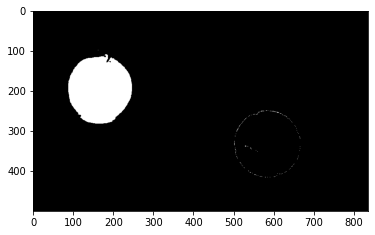

In [5]:
mask1 = cv2.inRange(hsv, lower1, upper1)
plt.imshow(mask1, 'gray')

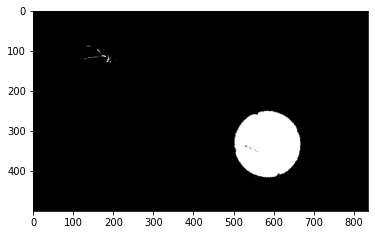

In [6]:
mask2 = cv2.inRange(hsv, lower2, upper2)
plt.imshow(mask2, 'gray')

Se hace una erosion y dilatacion para eliminar cualquier ruido que se produzca en la segmentacion.

. el 1er bloque corresponde a la figura1

. el 2do bloque corresponde a la figura2

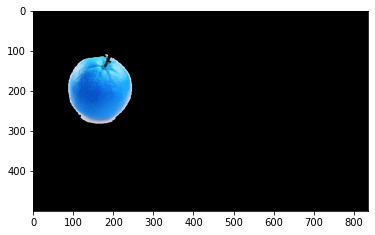

In [7]:
kernel1 = np.ones((3,3),np.uint8)
erosion1 = cv2.erode(mask1, kernel1, iterations = 1)
dilate1 = cv2.dilate(erosion1, kernel1, iterations = 1)
naranja = cv2.bitwise_and(img, img, mask=dilate1)
x1,y1,w1,h1 = cv2.boundingRect(dilate1)
plt.imshow(naranja)

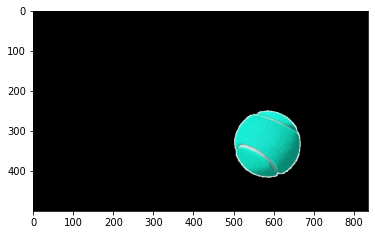

In [8]:
kernel2 = np.ones((3,3),np.uint8)
erosion2 = cv2.erode(mask2, kernel2, iterations = 2)
dilate2 = cv2.dilate(erosion2, kernel2, iterations = 3)
pelota = cv2.bitwise_and(img, img, mask=dilate2)
x2,y2,w2,h2 = cv2.boundingRect(dilate2)
plt.imshow(pelota)

Se encierra a la figura en un rectangulo para ver si el pre-procesamiento resulto correcto y finalmente se plotea el resultado.

<function matplotlib.pyplot.show>

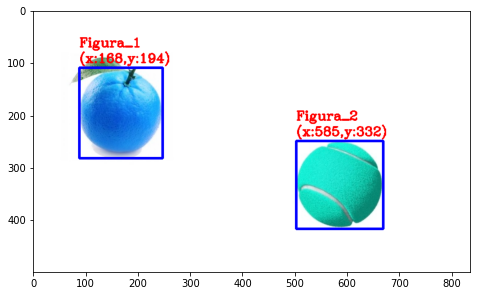

In [9]:
cv2.putText(img,"Figura_1",(x1,y1-40),cv2.FONT_HERSHEY_COMPLEX,0.8,(255,0,0),2)
cv2.rectangle(img,(x1,y1),(x1+w1,y1+h1),(0,0,255),3)
cv2.putText(img,"(x:"+str(x1+round(w1/2))+",y:"+str(y1+round(h1/2))+")",(x1,y1-10),cv2.FONT_HERSHEY_COMPLEX,0.8,(255,0,0),2)

cv2.putText(img,"Figura_2",(x2,y2-40),cv2.FONT_HERSHEY_COMPLEX,0.8,(255,0,0),2)
cv2.rectangle(img,(x2,y2),(x2+w2,y2+h2),(0,0,255),3)
cv2.putText(img,"(x:"+str(x2+round(w2/2))+",y:"+str(y2+round(h2/2))+")",(x2,y2-10),cv2.FONT_HERSHEY_COMPLEX,0.8,(255,0,0),2)

plt.figure(figsize=(12.8,4.8))
plt.imshow(img)
plt.show

## IMPORTANTE:
La ultima imagen esta en formato BGR, por eso el color, al momento de cambiar de BGR a RGB ocurre un problema por eso se dejo en ese formato, esto no perjudica en nada al formato RGB de la imagen original.